Exercise 1

In [2]:
! python -m pip install "qiskit-experiments[extras]"
! pip install pylatexenc


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=61047a2a1e43b2ac6292750b7574aa2e213006b4625f1a078951a881e5431fb3
  Stored in directory: /Users/jiakaiwang/Library/Caches/pip/wheels/3c/d9/c1/bb2a15d13c742b9035ef7ae6ebe236af270b1d1d9b386dcd5e
Successfully built pylatexenc


# Exercise 1

[1.00e-06 3.10e-05 6.10e-05 9.10e-05 1.21e-04 1.51e-04]


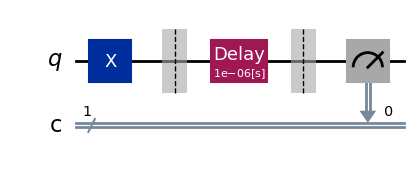

In [1]:
from qiskit_experiments.library import T1
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit_aer import AerSimulator
import numpy as np

backend = AerSimulator.from_backend(FakePerth())

qubit0_t1 = FakePerth().qubit_properties(0).t1
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)

exp = T1(physical_qubits=(0,), delays=delays)

print(delays)
exp.circuits()[0].draw(output="mpl", style="iqp")

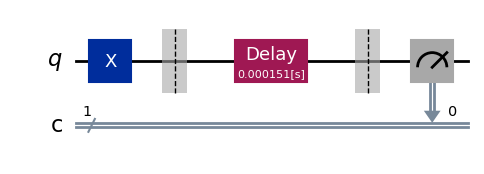

In [50]:
exp.circuits()[-1].draw(output="mpl", style="iqp")

JobStatus.DONE
AnalysisStatus.DONE


/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


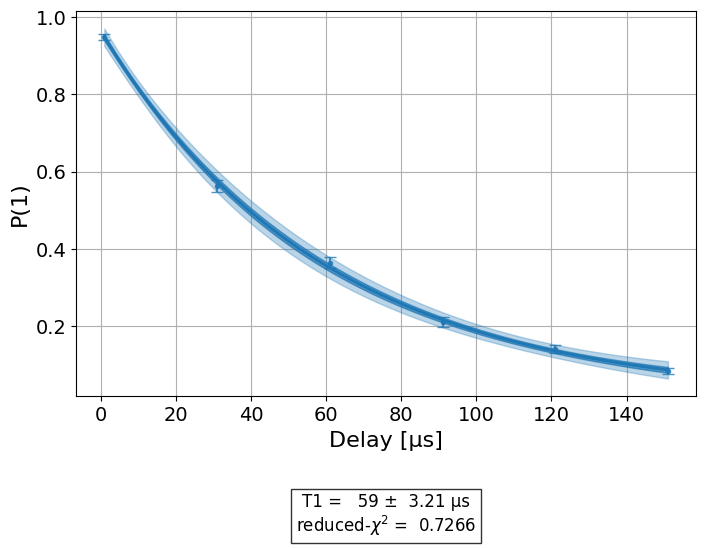

In [2]:
exp_data = exp.run(backend=backend).block_for_results()
print(exp_data.job_status())
print(exp_data.analysis_status())

display(exp_data.figure(0))

In [6]:
exp_data.analysis_results(dataframe=True)

,name,experiment,components,value,quality,backend,run_time,chisq,unit
4b6e0099,@Parameters_T1Analysis,T1,[Q0],CurveFitResult:\n - fitting method: least_squa...,good,aer_simulator_from(fake_perth),None,None,None
302c4901,T1,T1,[Q0],(5.90+/-0.32)e-05,good,aer_simulator_from(fake_perth),None,0.726618,s


In [7]:
print(exp_data.analysis_results("T1").value.nominal_value)
print(exp_data.analysis_results("T1").value.std_dev)

5.896952609468941e-05
3.212343387468598e-06


In [8]:
print(exp_data.artifacts("fit_summary").data)

CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 21
 - degree of freedom: 3
 - chi-square: 2.179854888579839
 - reduced chi-square: 0.7266182961932796
 - Akaike info crit.: -0.07500695708538174
 - Bayesian info crit.: -0.6997285494012164
 - init params:
  * amp = 0.8653658536585366
  * tau = 6.226876086456664e-05
  * base = 0.08341463414634147
 - fit params:
  * amp = 0.9514394360616925 ± 0.01713579829134621
  * tau = 5.896952609468941e-05 ± 3.212343387468598e-06
  * base = 0.01250244939482444 ± 0.016999844424321203
 - correlations:
  * (tau, base) = -0.9209428703756201
  * (amp, base) = -0.8920132853079822
  * (amp, tau) = 0.7597814798753488


In [9]:
print(exp_data.data(0))

{'job_id': '2a45b31b-7881-462b-b465-9b90a25fa3d3', 'meas_level': 2, 'meas_return': 'single', 'counts': {'1': 972, '0': 52}, 'memory': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 

In [10]:
print(exp_data.metadata)

{'physical_qubits': [0], 'device_components': [<Qubit(Q0)>], 'meas_level': <MeasLevel.CLASSIFIED: 2>, '_source': {'class': 'qiskit_experiments.framework.experiment_data.ExperimentData', 'metadata_version': 1, 'qiskit_version': {'qiskit': '1.2.4', 'qiskit-experiments': '0.8.0'}}}


Shots set to 1000, measurement level set to {exp.run_options.get('meas_level')}
Transpile options are Options(optimization_level=3, scheduling_method='asap', basis_gates=['x', 'sx', 'rz'])
Experiment options are Options(max_circuits=None, delays=array([1.00e-06, 5.10e-05, 1.01e-04, 1.51e-04, 2.01e-04, 2.51e-04,
       3.01e-04, 3.51e-04, 4.01e-04, 4.51e-04, 5.01e-04, 5.51e-04]))


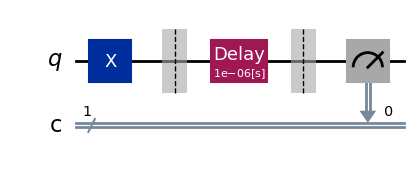

In [12]:
from qiskit.qobj.utils import MeasLevel

exp.set_run_options(shots=1000,
                    meas_level=MeasLevel.CLASSIFIED)
print(f"Shots set to {exp.run_options.get('shots')}, "
      "measurement level set to {exp.run_options.get('meas_level')}")

exp.set_transpile_options(scheduling_method='asap',
                          optimization_level=3,
                          basis_gates=["x", "sx", "rz"])
print(f"Transpile options are {exp.transpile_options}")

exp = T1(physical_qubits=(0,), delays=delays)
new_delays=np.arange(1e-6, 600e-6, 50e-6)
exp.set_experiment_options(delays=new_delays)
print(f"Experiment options are {exp.experiment_options}")

from qiskit_experiments.library import StandardRB

exp = StandardRB(physical_qubits=(0,),
                lengths=list(range(1, 300, 30)),
                seed=123,
                backend=backend)
exp.analysis.set_options(gate_error_ratio=None)

from qiskit_experiments.framework import ParallelExperiment

child_exp1 = T1(physical_qubits=(2,), delays=delays)
child_exp2 = StandardRB(physical_qubits=(3,1), lengths=np.arange(1,100,10), num_samples=2)
parallel_exp = ParallelExperiment([child_exp1, child_exp2])

parallel_exp.component_experiment(0).circuits()[0].draw(output="mpl", style="iqp")

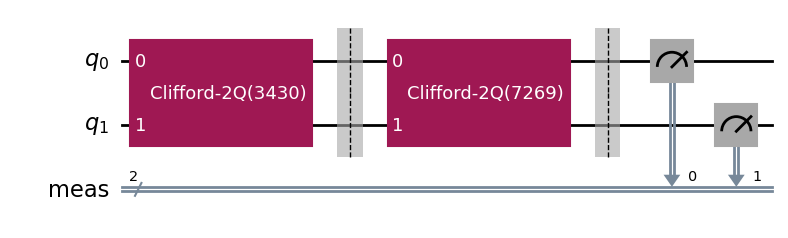

In [13]:
parallel_exp.component_experiment(1).circuits()[0].draw(output="mpl", style="iqp")

In [14]:
parallel_exp.component_experiment(0).analysis.set_options(plot = True)

# This should print out what we set because it's the same option
print(parallel_exp.analysis.component_analysis(0).options.get("plot"))

True


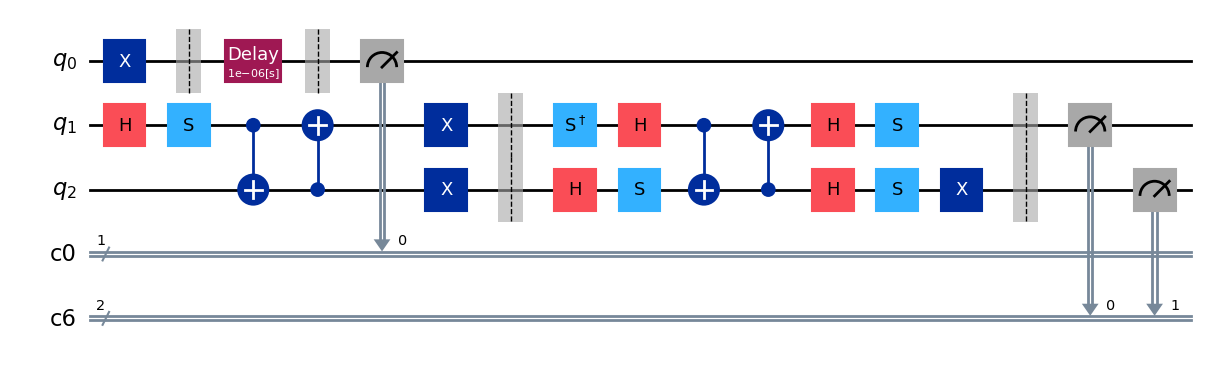

In [15]:
parallel_exp.circuits()[0].draw(output="mpl", style="iqp")

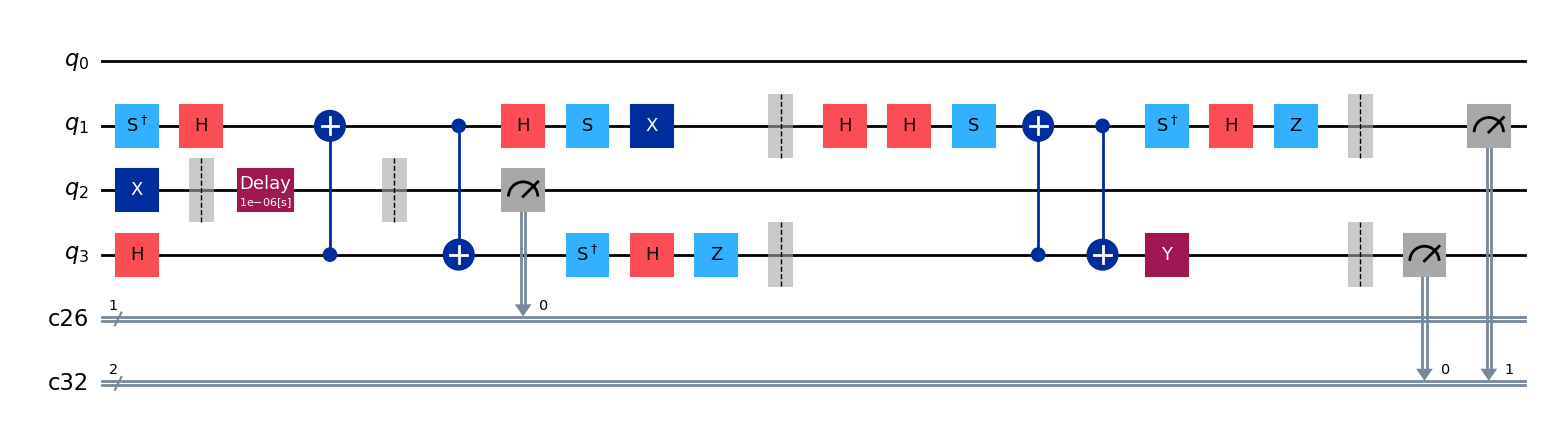

In [16]:
parallel_exp._transpiled_circuits()[0].draw(output="mpl", style="iqp")

# Exercise 2

In [17]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Gate error ratio: {'x': 1.0, 'rz': 0.0, 'sx': 1.0}


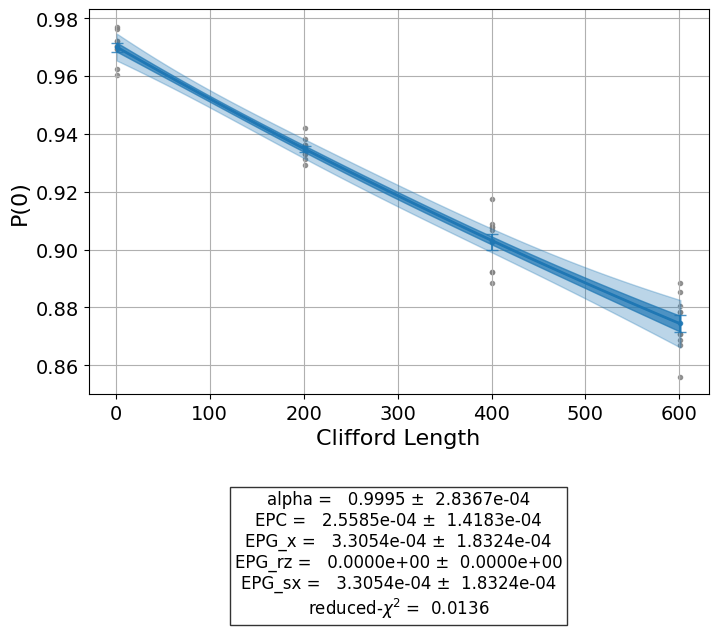

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 66
 - degree of freedom: 1
 - chi-square: 0.013595742435317398
 - reduced chi-square: 0.013595742435317398
 - Akaike info crit.: -16.737171810396053
 - Bayesian info crit.: -18.57828872703638
 - init params:
  * a = 0.4701292079906902
  * alpha = 0.9996214051893185
  * b = 0.5
 - fit params:
  * a = 0.3619114602976769 ± 0.17527446675431577
  * alpha = 0.9994883021009031 ± 0.0002836663590374191
  * b = 0.6082512059331197 ± 0.17603582890748995
 - correlations:
  * (a, b) = -0.9999698716311792
  * (alpha, b) = -0.998357393264811
  * (a, alpha) = 0.9980044778604262
- quality: good
- extra: <2 items>
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: alpha
- value: 0.99949+/-0.00028
- χ²: 0.013595742435317398
- quality: good
- extra: <2 items>
- device_componen

In [18]:
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Gate error ratio: {'cx': 1.0}


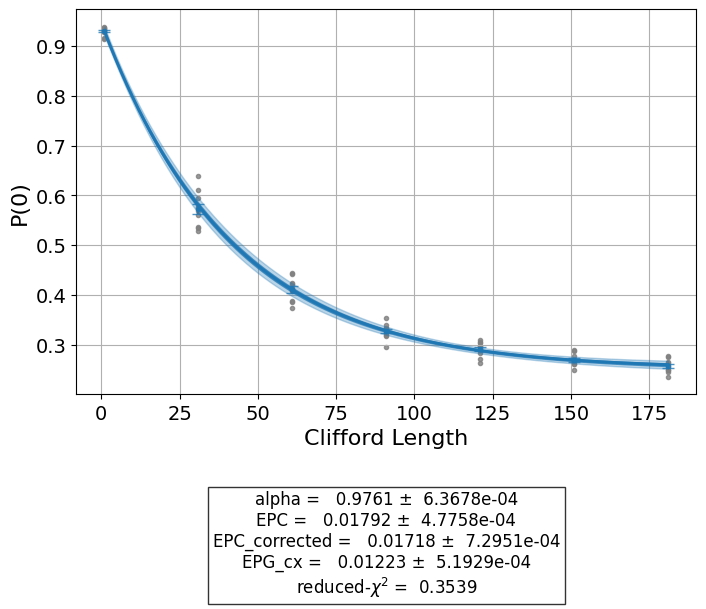

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 20
 - degree of freedom: 4
 - chi-square: 1.415435983528762
 - reduced chi-square: 0.3538589958821905
 - Akaike info crit.: -5.189307848949554
 - Bayesian info crit.: -5.351577401783614
 - init params:
  * a = 0.6975139027199987
  * alpha = 0.9749608973181932
  * b = 0.25
 - fit params:
  * a = 0.6956401057507628 ± 0.004436985156300543
  * alpha = 0.9761086734495711 ± 0.0006367779641775192
  * b = 0.25082494696571866 ± 0.0034950317452727823
 - correlations:
  * (alpha, b) = -0.7990154914447889
  * (a, b) = -0.6832210783151912
  * (a, alpha) = 0.43530731244259246
- quality: good
- extra: <2 items>
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9761+/-0.0006
- χ²: 0.3538589958821905
- quality: good
- extra: <2 items>
- device_compo

In [26]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB((qubit,), lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ]
)
expdata_1q = single_exps.run(backend).block_for_results()

# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

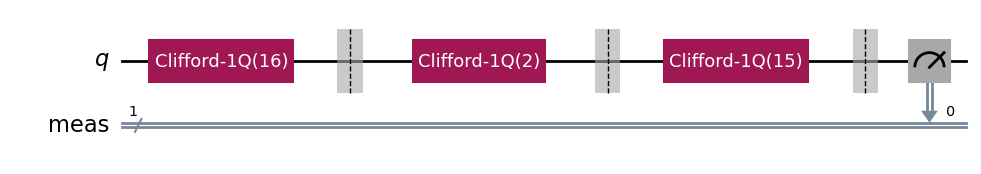

In [27]:
# Run an RB experiment on qubit 0
exp = StandardRB(physical_qubits=(0,), lengths=[2], num_samples=1, seed=seed)
c = exp.circuits()[0]
c.draw(output="mpl", style="iqp")

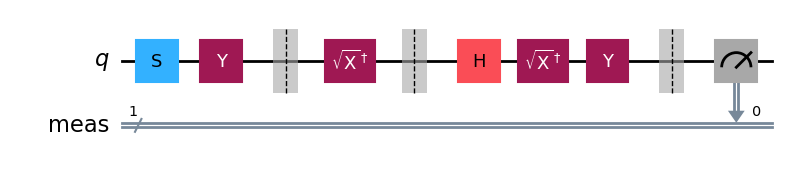

In [28]:
c.decompose().draw(output="mpl", style="iqp")

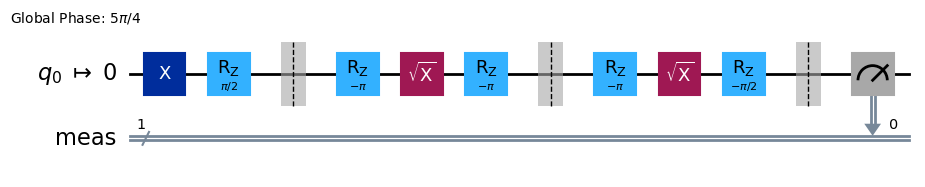

In [29]:
from qiskit import transpile
transpile(c, backend, **vars(exp.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


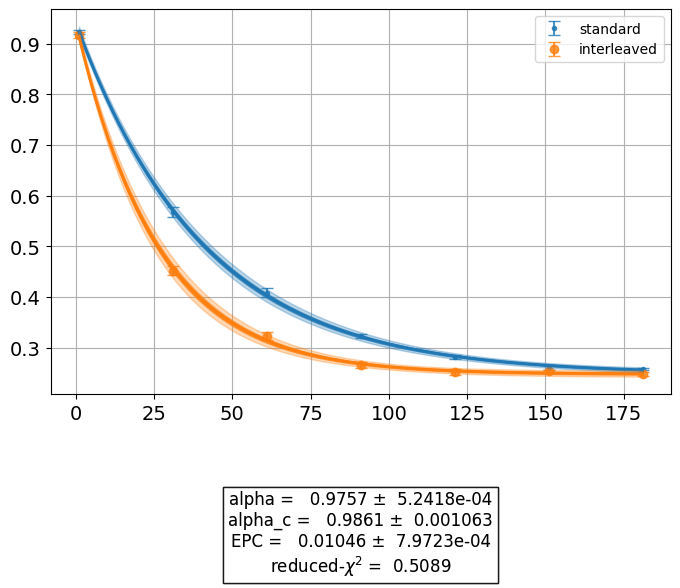

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 25
 - degree of freedom: 10
 - chi-square: 5.088527120456074
 - reduced chi-square: 0.5088527120456073
 - Akaike info crit.: -6.16896471515075
 - Bayesian info crit.: -3.6127353966897164
 - init params:
  * a = 0.6907726497801152
  * alpha = 0.9753911918764743
  * b = 0.25
  * alpha_c = 0.9896670416076504
 - fit params:
  * a = 0.6931616857406758 ± 0.0037396249223856583
  * alpha = 0.975727517112073 ± 0.0005241768639286449
  * b = 0.24798803519610274 ± 0.0020469560017089307
  * alpha_c = 0.9860530620001373 ± 0.0010629760589478993
 - correlations:
  * (alpha, b) = -0.6150016385139702
  * (a, b) = -0.4452051997889132
  * (alpha, alpha_c) = -0.18573751439320454
  * (b, alpha_c) = -0.15356639674581815
  * (a, alph

In [23]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# Number of samples to generate for each sequence length
# Seed because it's computer simulation
# 2-qubit gate is more error prone / is longer
# The interleaved has more error becuase it's more gates, the two-qubit gate error is associated with the difference in those two exponential decay rates

# Exercise 3

In [30]:
! pip install qutip qutip_qip matplotlib qiskit qutip-qtrl tqdm qiskit_aer

In [31]:
# Now with the neutral atom simulator
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qutip_qip.qiskit import QiskitCircuitSimulator,QiskitPulseSimulator
import uuid
import random
from collections import Counter

import numpy as np
from typing import List,Optional,Union ,Dict, Any
import matplotlib.pyplot as plt
import qutip
from qutip import basis, fidelity,sigmax, sigmay, sigmaz,identity,rand_unitary,tensor,mesolve,Qobj, Bloch
from qutip_qip.operations import  rx,ry,rz,cz_gate,expand_operator
from typing import List
from tqdm import tqdm
from qutip_qip.device import Processor, Model
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
import qiskit
import qutip
from qutip import basis
from qutip_qip.circuit import QubitCircuit
from qutip_qip.circuit.circuitsimulator import CircuitResult
from qutip_qip.device import Processor, Model

from qutip_qip.qiskit import QiskitSimulatorBase
from qutip_qip.qiskit.job import Job
from qutip_qip.qiskit.converter import convert_qiskit_circuit
from qiskit.providers import BackendV1, Options
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.result import Result, Counts
from qiskit.result.models import ExperimentResult, ExperimentResultData
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.circuit import QuantumCircuit
from qiskit.qobj import QobjExperimentHeader

class MyQiskitSimulatorBase(BackendV1):
    """
    The base class for ``qutip_qip`` based ``qiskit`` backends.
    """

    def __init__(self, configuration=None, **fields):
        if configuration is None:
            configuration_dict = self._DEFAULT_CONFIGURATION
        else:
            configuration_dict = self._DEFAULT_CONFIGURATION.copy()
            for k, v in configuration.items():
                configuration_dict[k] = v

        configuration = QasmBackendConfiguration.from_dict(configuration_dict)

        super().__init__(configuration=configuration)

        self.options.set_validator(
            "shots", (1, self.configuration().max_shots)
        )

    def run(self, qiskit_circuit: QuantumCircuit, **run_options) -> Job:
        """
        Simulates a circuit on the required backend.

        Parameters
        ----------
        qiskit_circuit : :class:`qiskit.circuit.QuantumCircuit`
            The ``qiskit`` circuit to be simulated.

        **run_options:
            Additional run options for the backend.

            Valid options are:

            shots : int
                Number of times to sample the results.
            allow_custom_gate: bool
                Allow conversion of circuit using unitary matrices
                for custom gates.

        Returns
        -------
        :class:`.Job`
            Job object that stores results and execution data.
        """
        # configure the options
        self.set_options(
            shots=(
                run_options["shots"]
                if "shots" in run_options
                else self._default_options().shots
            ),
            allow_custom_gate=(
                run_options["allow_custom_gate"]
                if "allow_custom_gate" in run_options
                else self._default_options().allow_custom_gate
            ),
        )
        
        # qutip_circ = convert_qiskit_circuit(
        #     qiskit_circuit,
        #     allow_custom_gate=self.options.allow_custom_gate,
        # )

        job_id = str(uuid.uuid4())

        # job = Job(
        #     backend=self,
        #     job_id=job_id,
        #     result=self._run_job(job_id, qutip_circ),
        # )
        job = Job(
            backend=self,
            job_id=job_id,
            result=self._run_job(job_id, qiskit_circuit),
        )
        return job

    def _sample_shots(self, count_probs: dict) -> Counts:
        """
        Sample measurements from a given probability distribution.

        Parameters
        ----------
        count_probs: dict
            Probability distribution corresponding
            to different classical outputs.

        Returns
        -------
        :class:`qiskit.result.Counts`
            Returns the ``Counts`` object sampled according to
            the given probabilities and configured shots.
        """
        shots = self.options.shots
        samples = random.choices(
            list(count_probs.keys()), list(count_probs.values()), k=shots
        )
        return Counts(Counter(samples))

    def _get_probabilities(self, state):
        """
        Given a state, return an array of corresponding probabilities.
        """
        if state.type == "oper":
            # diagonal elements of a density matrix are
            # the probabilities
            return state.diag()

        # squares of coefficients are the probabilities
        # for a ket vector
        return np.array([np.abs(coef) ** 2 for coef in state])

class MyQiskitPulseSimulator(MyQiskitSimulatorBase):
    """
    ``qiskit`` backend dealing with pulse-level simulation.

    Parameters
    ----------
    processor : :class:`.Processor`
        The processor model to be used for simulation.
        An instance of the required :class:`.Processor`
        object is to be provided after initialising
        it with the required parameters.

    configuration : dict
        Configurable attributes of the backend.

    Attributes
    ----------
    processor : :class:`.Processor`
        The processor model to be used for simulation.
    """

    processor = None
    MAX_QUBITS_MEMORY = 10
    BACKEND_NAME = "pulse_simulator"
    _DEFAULT_CONFIGURATION = {
        "backend_name": BACKEND_NAME,
        "backend_version": "0.1",
        "n_qubits": MAX_QUBITS_MEMORY,
        "url": "https://github.com/qutip/qutip-qip",
        "simulator": True,
        "local": True,
        "conditional": False,
        "open_pulse": False,
        "memory": False,
        "max_shots": int(1e6),
        "coupling_map": None,
        "description": "A qutip-qip based pulse-level \
            simulator based on the open system solver.",
        "basis_gates": [],
        "gates": [],
    }

    def __init__(self, processor: Processor, configuration=None, **fields):
        self.processor = processor
        super().__init__(configuration=configuration, **fields)

    def _parse_results(
        self, final_state: qutip.Qobj, job_id: str, qutip_circuit: QubitCircuit
    ) -> qiskit.result.Result:
        """
        Returns a parsed object of type :class:`qiskit.result.Result`
        for the pulse simulators.

        Parameters
        ----------
        density_matrix : :class:`.Qobj`
            The resulting density matrix obtained from `run_state` on
            a circuit using the Pulse simulator processors.

        job_id : str
            Unique ID identifying a job.

        qutip_circuit : :class:`.QubitCircuit`
            The circuit being simulated.

        Returns
        -------
        :class:`qiskit.result.Result`
            Result of the pulse simulation.
        """
        count_probs = {}
        counts = None

        # calculate probabilities of required states
        if final_state:
            for i, prob in enumerate(self._get_probabilities(final_state)):
                if not np.isclose(prob, 0):
                    count_probs[hex(i)] = prob
            # sample the shots from obtained probabilities
            counts = self._sample_shots(count_probs)

        exp_res_data = ExperimentResultData(
            counts=counts,
            statevector=(
                Statevector(data=final_state.full())
                if final_state.type == "ket"
                else DensityMatrix(data=final_state.full())
            ),
        )

        header = QobjExperimentHeader.from_dict(
            {
                "name": (
                    qutip_circuit.name
                    if hasattr(qutip_circuit, "name")
                    else ""
                ),
                "n_qubits": qutip_circuit.N,
            }
        )

        exp_res = ExperimentResult(
            shots=self.options.shots,
            success=True,
            data=exp_res_data,
            header=header,
        )

        result = Result(
            backend_name=self.configuration().backend_name,
            backend_version=self.configuration().backend_version,
            qobj_id=id(qutip_circuit),
            job_id=job_id,
            success=True,
            results=[exp_res],
        )

        return result

    def _run_job(self, job_id: str, 
                #  qutip_circuit: QubitCircuit
                qiskit_circuit: QuantumCircuit
                 ) -> Result:
        """
        Run a :class:`.QubitCircuit` on the Pulse Simulator.

        Parameters
        ----------
        job_id : str
            Unique ID identifying a job.

        qutip_circuit : :class:`.QubitCircuit`
            The circuit obtained after conversion
            from :class:`.QuantumCircuit` to :class:`.QubitCircuit`.

        Returns
        -------
        :class:`qiskit.result.Result`
            Result of the simulation.
        """
        zero_state = self.processor.generate_init_processor_state()

        # self.processor.load_circuit(qutip_circuit)
        self.processor.load_circuit(qiskit_circuit)
        result = self.processor.run_state(zero_state)

        if isinstance(result, Qobj):
            final_state = self.processor.get_final_circuit_state(result)
        else:
            final_state = self.processor.get_final_circuit_state(result.states[-1])

        if not isinstance(qiskit_circuit, list):
            qutip_circ = convert_qiskit_circuit(
                qiskit_circuit,
                allow_custom_gate=self.options.allow_custom_gate,
            )

            return self._parse_results(
                final_state=final_state, job_id=job_id, qutip_circuit=qutip_circ
            )
        return None

    @classmethod
    def _default_options(cls):
        """
        Default options for the backend.

        Options
        -------
        shots : int
            Number of times to sample the results.

        allow_custom_gate : bool
            Allow conversion of circuit using unitary matrices
            for custom gates.
        """
        return Options(shots=1024, allow_custom_gate=True)

GROUND = basis(4, 0)
EXCITED = basis(4, 1)
LEAKAGE = basis(4, 2)
RYDBERG = basis(4, 3)

class minimal_processor(Processor):

    basis_gates=['rx','rz','cz']
    qbt_dim = 4
    
    def __init__(self,num_qubits=2,gamma_r = 1 / 540):
        
        self.model=Model(num_qubits=num_qubits,
                         dims=[self.qbt_dim for _ in range(num_qubits)])
        self.num_qubits=num_qubits
        self.get_c_ops(gamma_r)

    def evolve(self,
               state:qutip.Qobj,
                ins: qiskit._accelerate.circuit.CircuitInstruction):
        name = ins.operation.name
        param = next(iter(ins.operation.params), None)
        qbts = [qubit._index for qubit in ins.qubits]

        # print(f"{name}, {param}, {qbts}")

        if name == 'rx':
            Omega_01 = 1
            return mesolve(
                    H=self.id_wrap(Omega_01/2 * (GROUND * EXCITED.dag() + EXCITED * GROUND.dag()),
                                   qbts[0]), 
                    rho0=state, 
                    tlist=np.array([0, param/Omega_01]), 
                    c_ops=self.collapse_ops, 
                    options={'store_final_state':True}
                )
        elif name == 'rz':
            delta_1 = 1
            H=self.id_wrap(delta_1 * EXCITED * EXCITED.dag(),
                                   qbts[0])
            # print(H)
            return mesolve(
                    H=H, 
                    rho0=state, 
                    tlist=np.array([0,param/delta_1]), 
                    c_ops=self.collapse_ops, 
                    options={'store_final_state':True}
                )
        elif name == 'cz':
            t_tot = 0.540 #microsecond, which is the total duration of the gate protocol
            B=200*2*np.pi #interaction strength
            omegaMax = 17*2*np.pi #Mhz
            deltaMax = 23*2*np.pi #Mhz
            tau = 0.175*t_tot 
            a = np.exp(-(t_tot/4)**4/tau**4)
            def Rabi_frequency(t,args):
                return (t<t_tot/2)*omegaMax*(np.exp(-(t-t_tot/4)**4/tau**4)-a)/(1-a)    \
                +    (t>=t_tot/2)*omegaMax*(np.exp(-(t-3*t_tot/4)**4/tau**4)-a)/(1-a)
            def Detunning(t,args):
                return (t<t_tot/2)*(-1)*deltaMax*np.cos(2*np.pi*t/t_tot) \
                        +    (t>=t_tot/2)*deltaMax*np.cos(2*np.pi*t/t_tot)
            H = []
            for idx in qbts:
                H.append([self.id_wrap(0.5*RYDBERG*EXCITED.dag()+0.5*EXCITED*RYDBERG.dag(), 
                                       idx),
                          Rabi_frequency])
                H.append([self.id_wrap(RYDBERG*RYDBERG.dag(), 
                                       idx),
                          Detunning])
                
            H.append(
                self.id_wrap(B*tensor(RYDBERG,RYDBERG)*tensor(RYDBERG,RYDBERG).dag(),qbts)
            ) # This assumes the system involves two qubit only.
            # print(H)
            # print(self.collapse_ops)
            return mesolve(
                    H=H, 
                    rho0=state, 
                    tlist=np.array([0, t_tot]), 
                    c_ops=self.collapse_ops, 
                    options={'store_final_state':True,'nsteps':10000}  
                )
            
    
    def run_state(self,
                  init_state:qutip.Qobj) -> qutip.solver.Result:
        if init_state.isket:
            assert init_state.dims == [[self.qbt_dim for _ in range(self.num_qubits)],[1 for _ in range(self.num_qubits)]]
        else:
            assert init_state.dims == [[self.qbt_dim for _ in range(self.num_qubits)],[self.qbt_dim for _ in range(self.num_qubits)]]
        state = init_state
        result = state
        for ins in tqdm(self.qiskit_circ_transpiled,'Simulating gate'):
            if isinstance(ins, qiskit.circuit.CircuitInstruction):
                if self.evolve(state,ins) is not None:
                    result = self.evolve(state,ins)
                    state = result.final_state
                else: return result
        return result
    
    def generate_init_processor_state(self)->qutip.Qobj:
        # Always initialize in zero
        return tensor([basis(self.qbt_dim, 0) for _ in range(self.num_qubits)])
    
    def id_wrap(self,
                op:qutip.Qobj,
                idx:Union[int,List[int]])->qutip.Qobj:
        if isinstance(idx,int):
            idx = [idx]
        return expand_operator(oper=op,
                               dims=[self.qbt_dim for _ in range(self.num_qubits)],
                               targets=idx)

    
    def get_c_ops(self,gamma_r):
        L0 = np.sqrt(1/16 * gamma_r) * (GROUND * RYDBERG.dag())
        L1 = np.sqrt(1/16 * gamma_r) * (EXCITED * RYDBERG.dag())
        Ld = np.sqrt(7/8 * gamma_r) * (LEAKAGE * RYDBERG.dag())
        single_q_c_ops = [L0, L1, Ld]

        self.collapse_ops = []
        for q in range(self.num_qubits):
            for c_op in single_q_c_ops:
                self.collapse_ops.append(self.id_wrap(c_op,
                                                      q))
    
    def load_circuit(self,
                     qiskit_circuit:qiskit.QuantumCircuit)->None:
        self.qiskit_circ_transpiled = transpile(qiskit_circuit,basis_gates=self.basis_gates)
        # self.qiskit_circ_transpiled = qiskit_circ_transpiled
    
    def get_final_circuit_state(self,state:qutip.Qobj)->qutip.Qobj:
        rho = state
        if rho.isket:
            rho = qutip.ket2dm(rho)
        rho_arr = rho.full()
        rho_reshaped = rho_arr.reshape(*[self.qbt_dim for _ in range(self.num_qubits*2)])
        # print(rho_reshaped.shape)
        rho_reshaped_2lvl = rho_reshaped[tuple(slice(0, 2) for _ in range(2 * self.num_qubits))]
        # print(rho_reshaped_2lvl.shape)
        return Qobj(rho_reshaped_2lvl.reshape(2**self.num_qubits , 2**self.num_qubits), dims=[[2] * self.num_qubits, [2] * self.num_qubits])


/var/folders/9k/z8bpg3hj3d9841ggs75xmwxw0000gn/T/ipykernel_10725/2187694626.py:31: DeprecationWarning: qiskit.providers.models is deprecated since Qiskit 1.2 and will be removed in Qiskit 2.0. With the removal of Qobj, there is no need for these schema-conformant objects. If you still need to use them, it could be because you are using a BackendV1, which is also deprecated in favor of BackendV2.
  from qiskit.providers.models import QasmBackendConfiguration
